In [1]:
# Task 1: Preprocess & EDA
import sys
import os

# Add the src folder to Python path
sys.path.append(os.path.abspath(".."))
from src.data_loader import download_data
from src.preprocess import align_and_merge, compute_daily_returns
from src.eda import (
    plot_prices,
    plot_correlation_heatmap,
    plot_rolling_volatility,
    detect_outliers,
    perform_adf_test,
    calculate_var,
    calculate_sharpe_ratio
)

# Parameters
tickers = ["TSLA", "SPY", "BND"]
start_date = "2020-01-01"
end_date = "2025-01-01"

In [3]:
# --- Step 1: Data Acquisition and Preprocessing ---
print("--- 1. Downloading and Preprocessing Data ---")
data_dict = download_data(tickers, start_date, end_date)
merged_df = align_and_merge(data_dict)
returns_df = compute_daily_returns(merged_df)
print("Data preprocessing complete.\n")

--- 1. Downloading and Preprocessing Data ---


d:\week-11\gmf-time-series-portfolio-optimization\src\data_loader.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
d:\week-11\gmf-time-series-portfolio-optimization\src\data_loader.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
d:\week-11\gmf-time-series-portfolio-optimization\src\data_loader.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

Data download complete.
Data preprocessing complete.



--- 3. Generating Visualizations ---


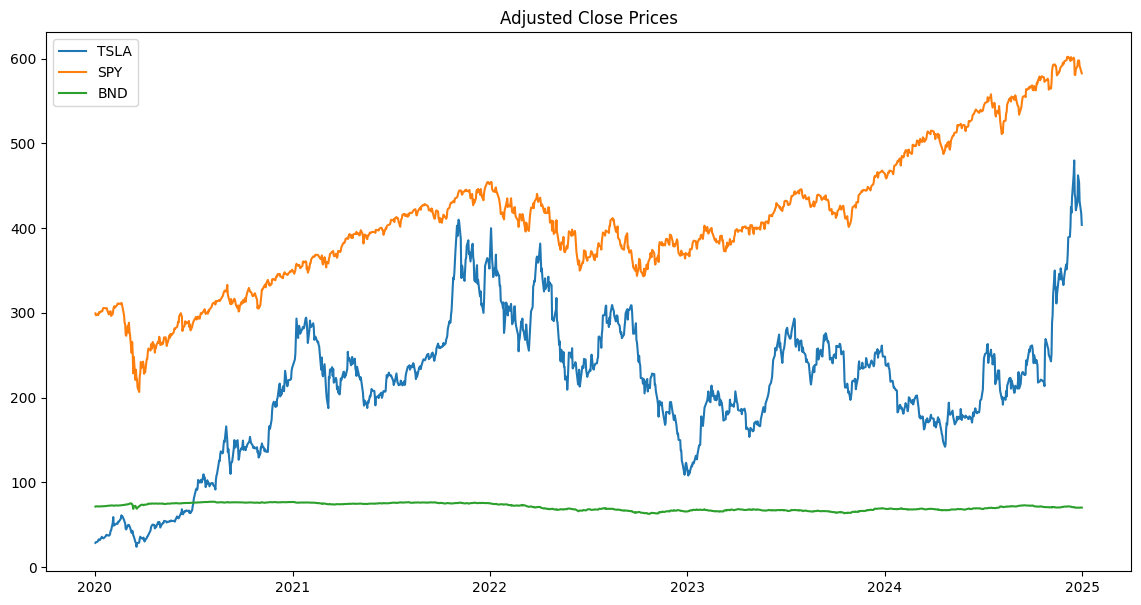

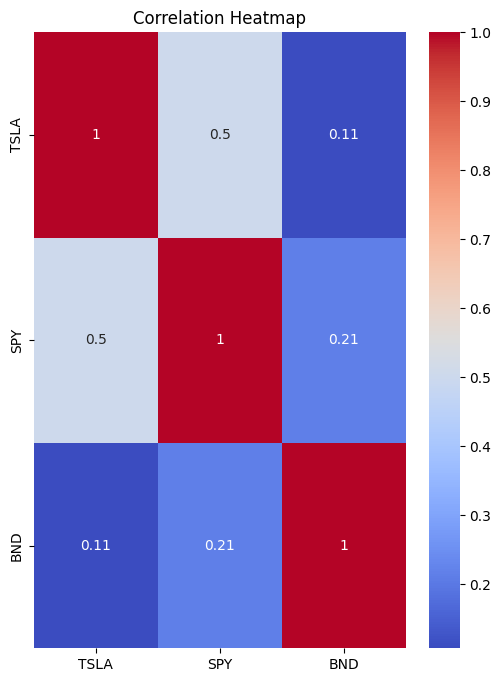

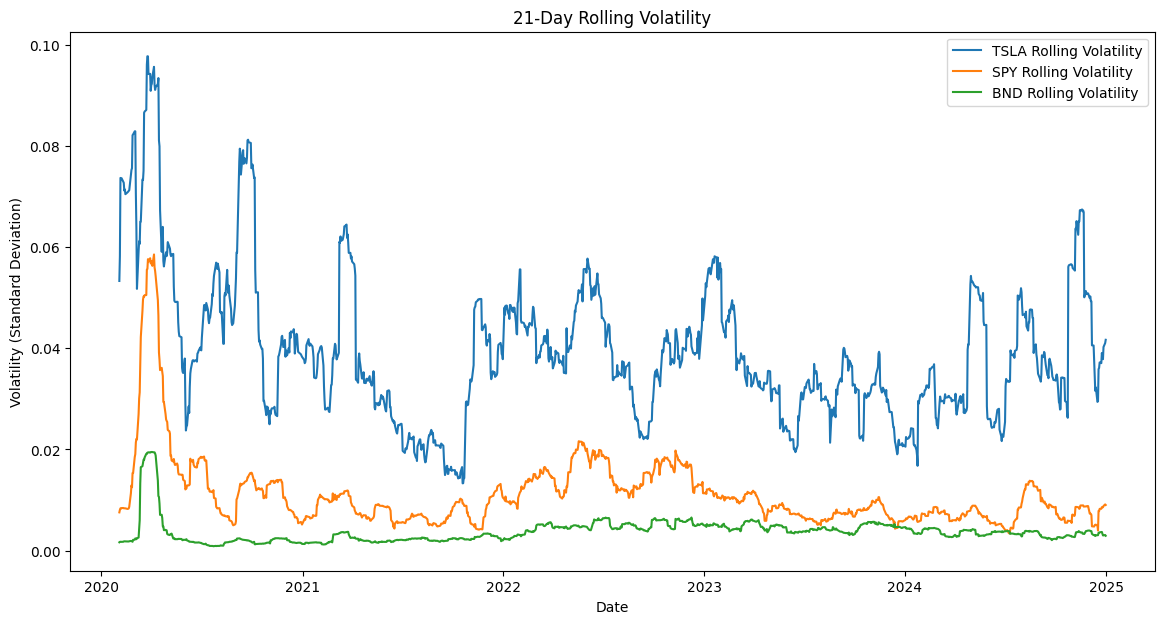

Visualizations saved to the 'figures' directory.



In [4]:
# --- Step 3: Visualizations ---
print("--- 3. Generating Visualizations ---")
plot_prices(merged_df, save_path="figures/prices.png")
plot_correlation_heatmap(returns_df, save_path="figures/corr_heatmap.png")
plot_rolling_volatility(returns_df, window=21, save_path="figures/rolling_volatility.png")
print("Visualizations saved to the 'figures' directory.\n")

In [5]:
# --- Step 4: Stationarity Analysis ---
print("--- 4. Stationarity Analysis (ADF Test) ---")
for ticker in tickers:
    perform_adf_test(returns_df[ticker], ticker)

--- 4. Stationarity Analysis (ADF Test) ---
--- ADF Test for TSLA ---
ADF Statistic: -35.4737
p-value: 0.0000
Conclusion: The series is likely stationary (p-value <= 0.05).

--- ADF Test for SPY ---
ADF Statistic: -10.7383
p-value: 0.0000
Conclusion: The series is likely stationary (p-value <= 0.05).

--- ADF Test for BND ---
ADF Statistic: -13.7517
p-value: 0.0000
Conclusion: The series is likely stationary (p-value <= 0.05).



In [6]:

# --- Step 5: Risk and Return Metrics ---
print("--- 5. Calculating Risk and Return Metrics ---")
# Calculate and print Value at Risk (VaR)
var = calculate_var(returns_df)
print("Value at Risk (VaR) at 95% confidence:")
print(var)
print("\n")


--- 5. Calculating Risk and Return Metrics ---
Value at Risk (VaR) at 95% confidence:
TSLA   -0.062812
SPY    -0.019253
BND    -0.006196
Name: 0.050000000000000044, dtype: float64




In [7]:

# Calculate and print Sharpe Ratio
sharpe_ratio = calculate_sharpe_ratio(returns_df)
print("Annualized Sharpe Ratio:")
print(sharpe_ratio)
print("\n")

Annualized Sharpe Ratio:
TSLA    1.094568
SPY     0.645982
BND    -0.300377
dtype: float64




In [8]:


# --- Step 6: Outlier Detection ---
print("--- 6. Detecting Outliers ---")
outliers = detect_outliers(returns_df)
if not outliers.empty:
    print("Detected Outliers (Returns > 3 Std Dev from Mean):")
    print(outliers)
else:
    print("No significant outliers detected.")
print("\n")



--- 6. Detecting Outliers ---
Detected Outliers (Returns > 3 Std Dev from Mean):
                TSLA       SPY       BND
Date                                    
2020-02-03  0.198949       NaN       NaN
2020-02-04  0.137256       NaN       NaN
2020-02-05 -0.171758       NaN       NaN
2020-02-27 -0.128146       NaN       NaN
2020-03-09 -0.135725       NaN       NaN
2020-03-16 -0.185778       NaN       NaN
2020-03-18 -0.160344       NaN       NaN
2020-03-19  0.183877       NaN       NaN
2020-03-24  0.162817       NaN       NaN
2020-04-13  0.136038       NaN       NaN
2020-07-06  0.134794       NaN       NaN
2020-08-12  0.131236       NaN       NaN
2020-09-08 -0.210628       NaN       NaN
2021-03-09  0.196412       NaN       NaN
2022-01-03  0.135317       NaN       NaN
2024-04-29  0.153069       NaN       NaN
2024-10-24  0.219190       NaN       NaN
2024-11-06  0.147510       NaN       NaN
2020-02-27       NaN -0.044912       NaN
2020-03-02       NaN  0.043307       NaN
2020-03-04       

In [11]:
# --- Step 7: Save Processed Data ---
print("--- 7. Saving Processed Data ---")
merged_df.to_csv("data/processed/merged_prices.csv")
returns_df.to_csv("data/processed/daily_returns.csv")
print("Processed data saved to the 'data/processed' directory.\n")



--- 7. Saving Processed Data ---
Processed data saved to the 'data/processed' directory.

